# Normal steps in training

In [3]:
import torch
import torch.nn as nn
# from fastai.vision.all import *

In [4]:
lenet = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(400, 120),
            nn.Dropout(p=0.5),
            nn.Linear(120, 84),
            nn.Dropout(p=0.5),
            nn.Linear(84,10)      
)

In [5]:
def look_in_seq(net, X):
    out = X
    for layer in net:
        out = layer(out)
        print(f"For {layer.__class__.__name__} shape: {out.shape}")

In [6]:
X = torch.randn(10,1,28,28)

In [12]:
look_in_seq(lenet,X)

# at least it shows it can handle inputs that have 1 channel 

For Conv2d shape: torch.Size([10, 6, 28, 28])
For ReLU shape: torch.Size([10, 6, 28, 28])
For AvgPool2d shape: torch.Size([10, 6, 14, 14])
For Conv2d shape: torch.Size([10, 16, 10, 10])
For ReLU shape: torch.Size([10, 16, 10, 10])
For AvgPool2d shape: torch.Size([10, 16, 5, 5])
For Flatten shape: torch.Size([10, 400])
For Linear shape: torch.Size([10, 120])
For Dropout shape: torch.Size([10, 120])
For Linear shape: torch.Size([10, 84])
For Dropout shape: torch.Size([10, 84])
For Linear shape: torch.Size([10, 10])


In [6]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [7]:
my_transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(download=False, root="../data", train=True, transform=my_transform)
test_dataset = datasets.MNIST(download=False, root="../data", train=False, transform=my_transform)
batch_size=64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True )
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
# train_dataset[0]

tensor([9, 1, 3, 1, 0, 2, 3, 5, 6, 2, 0, 0, 3, 5, 3, 7, 0, 7, 0, 9, 4, 6, 3, 5,
        5, 1, 6, 1, 8, 8, 3, 5, 6, 2, 5, 0, 5, 2, 9, 5, 9, 2, 3, 2, 2, 5, 1, 2,
        8, 9, 2, 9, 9, 8, 1, 7, 6, 8, 8, 7, 1, 9, 0, 4])


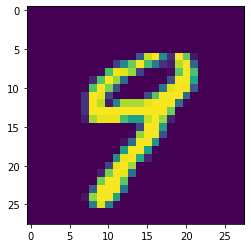

In [25]:
for X, y in train_dataloader:
    break
    
import matplotlib.pyplot as plt

plt.imshow(X[0].permute(1,2,0))
print(y)

In [8]:
def accuracy(y_hat, y):
    return (y_hat.argmax()== y).sum()

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

try lightning training loop from here: https://pytorch-lightning.readthedocs.io/en/latest/common/lightning_module.html

In [10]:
def train_net(net, lr=2e-4, num_epochs=3):
    net = net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr )
    loss = nn.CrossEntropyLoss()
    
    
    train_loss = []
    train_acc = []
    
    for epoch in range(num_epochs):
        loss_val = 0
        number_val = 0
        acc_val = 0
        for X, y in train_dataloader:
            X = X.to(device)
            y = y.to(device)
            
            y_hat = net(X)
            acc_val += accuracy(y_hat, y)
            optimizer.zero_grad()
            
            l = loss(y_hat, y)
            
            l.backward()
            
            optimizer.step()
            
            loss_val += l
            number_val += len(y)
            
        
        acc_factor = (acc_val/number_val).detach().cpu()
        loss_factor = (loss_val/number_val).detach().cpu()
        
#         print(type(acc_factor))
#         break
        
        train_acc.append(acc_factor)
        train_loss.append(loss_factor)
        print(f" For epoch: {epoch+1}")
        print(f" Current accuracy : {acc_factor}")
        print(f" Current loss : {loss_factor}")

    
    plt.plot(range(num_epochs), train_loss)
#     plt.show()
    plt.plot(range(num_epochs), train_acc)
    plt.show()

 For epoch: 1
 Current accuracy : 0.0011166667100042105
 Current loss : 0.03401719778776169
 For epoch: 2
 Current accuracy : 0.0023499999660998583
 Current loss : 0.033573947846889496


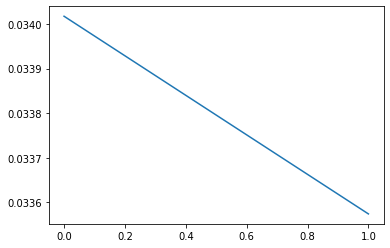

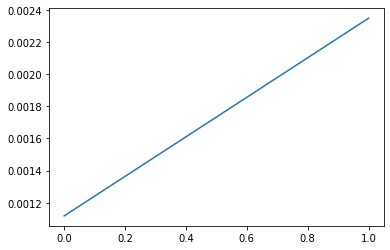

In [73]:
# train_net(lenet,num_epochs=2)

# didnt work with initial accuracy

for lr:  0.1
 For epoch: 1
 Current accuracy : 0.002216666704043746
 Current loss : 0.001324439886957407
 For epoch: 2
 Current accuracy : 0.001550000044517219
 Current loss : 0.0011986119206994772
 For epoch: 3
 Current accuracy : 0.0012333333725109696
 Current loss : 0.0010381645988672972
 For epoch: 4
 Current accuracy : 0.0017999999690800905
 Current loss : 0.0009728980949148536
 For epoch: 5
 Current accuracy : 0.002733333269134164
 Current loss : 0.000910178932826966
 For epoch: 6
 Current accuracy : 0.0011500000255182385
 Current loss : 0.0008418476791121066
 For epoch: 7
 Current accuracy : 0.0017666666535660625
 Current loss : 0.0007925244863145053
 For epoch: 8
 Current accuracy : 0.0017166667385026813
 Current loss : 0.0007753735990263522
 For epoch: 9
 Current accuracy : 0.0020666667260229588
 Current loss : 0.0007405195501632988
 For epoch: 10
 Current accuracy : 0.00283333333209157
 Current loss : 0.0007213964127004147


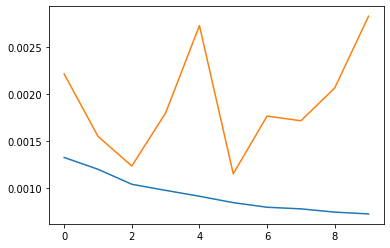

for lr:  0.01
 For epoch: 1
 Current accuracy : 0.001466666697524488
 Current loss : 0.0005509995971806347
 For epoch: 2
 Current accuracy : 0.001449999981559813
 Current loss : 0.0004988459404557943
 For epoch: 3
 Current accuracy : 0.0012499999720603228
 Current loss : 0.0005138287087902427
 For epoch: 4
 Current accuracy : 0.0018666667165234685
 Current loss : 0.0005007842555642128
 For epoch: 5
 Current accuracy : 0.0010166666470468044
 Current loss : 0.0004884138470515609
 For epoch: 6
 Current accuracy : 0.0017333333380520344
 Current loss : 0.0004923628293909132
 For epoch: 7
 Current accuracy : 0.0012333333725109696
 Current loss : 0.00046671146992594004
 For epoch: 8
 Current accuracy : 0.001366666634567082
 Current loss : 0.0004664931329898536
 For epoch: 9
 Current accuracy : 0.0015333333285525441
 Current loss : 0.000461194955278188
 For epoch: 10
 Current accuracy : 0.001366666634567082
 Current loss : 0.0004704855673480779


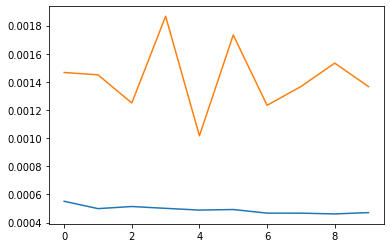

for lr:  0.001
 For epoch: 1
 Current accuracy : 0.0013000000035390258
 Current loss : 0.0004354736884124577
 For epoch: 2
 Current accuracy : 0.002850000048056245
 Current loss : 0.00045131603837944567
 For epoch: 3
 Current accuracy : 0.0008666666690260172
 Current loss : 0.0004505154793150723
 For epoch: 4
 Current accuracy : 0.0017500000540167093
 Current loss : 0.0004432215937413275
 For epoch: 5
 Current accuracy : 0.0013000000035390258
 Current loss : 0.00045551371295005083
 For epoch: 6
 Current accuracy : 0.00143333338201046
 Current loss : 0.0004594667407218367
 For epoch: 7
 Current accuracy : 0.0012000000569969416
 Current loss : 0.0004496493493206799
 For epoch: 8
 Current accuracy : 0.0016333333915099502
 Current loss : 0.0004393980489112437
 For epoch: 9
 Current accuracy : 0.0016499999910593033
 Current loss : 0.00043132377322763205
 For epoch: 10
 Current accuracy : 0.0019500000635161996
 Current loss : 0.0004545604169834405


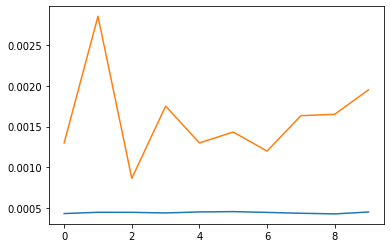

for lr:  0.0001
 For epoch: 1
 Current accuracy : 0.0009500000160187483
 Current loss : 0.00044812704436481
 For epoch: 2
 Current accuracy : 0.002199999988079071
 Current loss : 0.00044609009637497365
 For epoch: 3
 Current accuracy : 0.002283333335071802
 Current loss : 0.00043117161840200424
 For epoch: 4
 Current accuracy : 0.0008166666957549751
 Current loss : 0.00044926864211447537
 For epoch: 5
 Current accuracy : 0.0020000000949949026
 Current loss : 0.000440556148532778
 For epoch: 6
 Current accuracy : 0.002183333272114396
 Current loss : 0.0004463312216103077
 For epoch: 7
 Current accuracy : 0.0019833333790302277
 Current loss : 0.000428396015195176
 For epoch: 8
 Current accuracy : 0.002033333294093609
 Current loss : 0.00043664933764375746
 For epoch: 9
 Current accuracy : 0.002950000111013651
 Current loss : 0.00044298364082351327
 For epoch: 10
 Current accuracy : 0.00215000007301569
 Current loss : 0.00044791694381274283


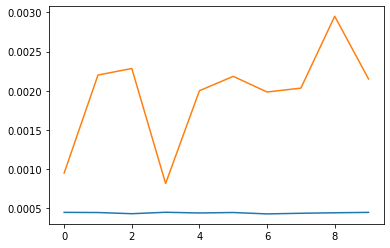

for lr:  1e-05
 For epoch: 1
 Current accuracy : 0.0013500000350177288
 Current loss : 0.00044896980398334563
 For epoch: 2
 Current accuracy : 0.0010833333944901824
 Current loss : 0.0004623217973858118
 For epoch: 3
 Current accuracy : 0.0012166666565462947
 Current loss : 0.00044837535824626684
 For epoch: 4
 Current accuracy : 0.0010166666470468044
 Current loss : 0.0004550477606244385
 For epoch: 5
 Current accuracy : 0.0017333333380520344
 Current loss : 0.00043730309698730707
 For epoch: 6
 Current accuracy : 0.0018166666850447655
 Current loss : 0.00043632081360556185
 For epoch: 7
 Current accuracy : 0.0011166667100042105
 Current loss : 0.0004532908496912569
 For epoch: 8
 Current accuracy : 0.0012833334039896727
 Current loss : 0.00042938278056681156
 For epoch: 9
 Current accuracy : 0.0026499999221414328
 Current loss : 0.00043307707528583705
 For epoch: 10
 Current accuracy : 0.0017166667385026813
 Current loss : 0.0004347599751781672


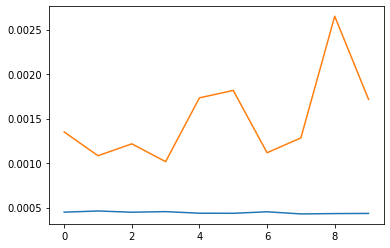

for lr:  1e-06
 For epoch: 1
 Current accuracy : 0.001550000044517219
 Current loss : 0.0004458656476344913
 For epoch: 2
 Current accuracy : 0.0017333333380520344
 Current loss : 0.0004471577994991094
 For epoch: 3
 Current accuracy : 0.0010833333944901824
 Current loss : 0.00043406785698607564
 For epoch: 4
 Current accuracy : 0.002383333398029208
 Current loss : 0.0004630891198758036
 For epoch: 5
 Current accuracy : 0.0018666667165234685
 Current loss : 0.00044594804057851434
 For epoch: 6
 Current accuracy : 0.0016333333915099502
 Current loss : 0.0004355988639872521
 For epoch: 7
 Current accuracy : 0.001600000075995922
 Current loss : 0.0004417794698383659
 For epoch: 8
 Current accuracy : 0.0019833333790302277
 Current loss : 0.00044444980449043214
 For epoch: 9
 Current accuracy : 0.0019833333790302277
 Current loss : 0.00042818617657758296
 For epoch: 10
 Current accuracy : 0.0019666666630655527
 Current loss : 0.0004466265090741217


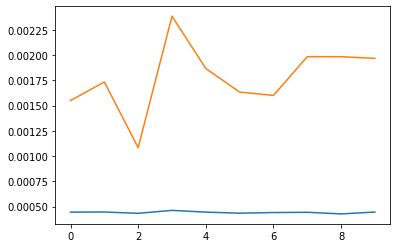

In [77]:
#lr_arr = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
lr_arr = [0.1]
for lr in lr_arr:
    print("for lr: ", lr)
    train_net(lenet, lr=lr, num_epochs=10)

### trying https://github.com/davidtvs/pytorch-lr-finder

In [1]:
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.36E-01


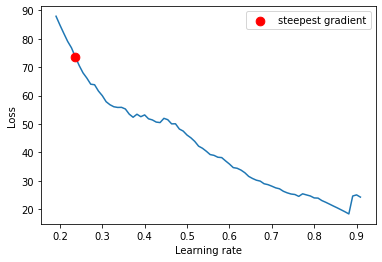

In [14]:
from torch_lr_finder import LRFinder

model = lenet
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device=device)

lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()


In [15]:
train_net(lenet, lr=2.36e-01, num_epochs=10)

 For epoch: 1
 Current accuracy : 0.0017999999690800905
 Current loss : 0.004402260761708021
 For epoch: 2
 Current accuracy : 0.0017666666535660625
 Current loss : 0.0011515819933265448
 For epoch: 3
 Current accuracy : 0.0018666667165234685
 Current loss : 0.0008818969363346696
 For epoch: 4
 Current accuracy : 0.0024166665971279144
 Current loss : 0.0007368036895059049
 For epoch: 5
 Current accuracy : 0.0019000000320374966
 Current loss : 0.000643142790067941
 For epoch: 6
 Current accuracy : 0.0010333333630114794
 Current loss : 0.0005824256222695112
 For epoch: 7
 Current accuracy : 0.0009833333315327764
 Current loss : 0.0005646416684612632
 For epoch: 8
 Current accuracy : 0.001600000075995922
 Current loss : 0.0005043389974161983
 For epoch: 9
 Current accuracy : 0.00143333338201046
 Current loss : 0.0004797263245563954
 For epoch: 10
 Current accuracy : 0.0013833333505317569
 Current loss : 0.0004546277632471174


NameError: name 'plt' is not defined

In [22]:
import matplotlib.pyplot as plt

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.82E-01


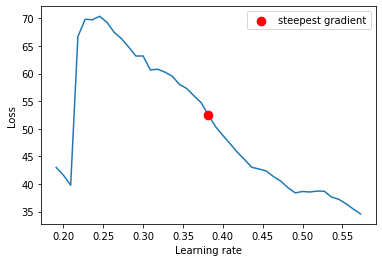

In [21]:
model =lenet
lr_finder = LRFinder(model, optimizer, criterion, device=device)

lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()


 For epoch: 1
 Current accuracy : 0.0018833333160728216
 Current loss : 0.0005650368402712047
 For epoch: 2
 Current accuracy : 0.002216666704043746
 Current loss : 0.0004741419979836792
 For epoch: 3
 Current accuracy : 0.0019166666315868497
 Current loss : 0.0004611103795468807
 For epoch: 4
 Current accuracy : 0.00071666669100523
 Current loss : 0.0004099076031707227
 For epoch: 5
 Current accuracy : 0.001500000013038516
 Current loss : 0.00042009243043139577
 For epoch: 6
 Current accuracy : 0.0019833333790302277
 Current loss : 0.0003782960120588541
 For epoch: 7
 Current accuracy : 0.0018500000005587935
 Current loss : 0.0003676604828797281
 For epoch: 8
 Current accuracy : 0.0017333333380520344
 Current loss : 0.0003358158573973924
 For epoch: 9
 Current accuracy : 0.001416666666045785
 Current loss : 0.0003257126663811505
 For epoch: 10
 Current accuracy : 0.0013333333190530539
 Current loss : 0.0003549173707142472


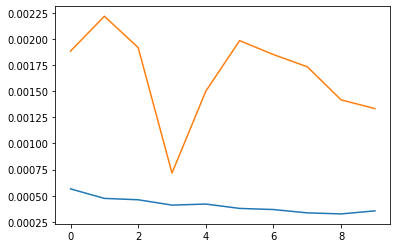

In [23]:
train_net(lenet, lr=3.82e-01, num_epochs=10)

# i fearthere mightbe something wrong with my traning loop.

In [ ]:
# update training loop 